In [40]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function to check if a word is English
def is_english(word):
    synsets = wordnet.synsets(word)
    return len(synsets) > 0

# Function to remove non-English text from a string
def remove_non_english(text):
    english_words = []
    words = word_tokenize(text)
    for word in words:
        if is_english(word):
            english_words.append(word)
    return ' '.join(english_words)

# Function to perform lemmatization on a string
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [3]:
# Read the CSV file
df = pd.read_csv("/content/sentiment analysis12.csv", encoding='unicode_escape')

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
# Remove non-English text, lemmatize, and tokenize
df['Cleaned_Text'] = df['Text'].apply(remove_non_english)
df['Lemmatized_Text'] = df['Cleaned_Text'].apply(lemmatize_text)
df['Tokenized_Text'] = df['Lemmatized_Text'].apply(word_tokenize)

In [7]:
# Function to calculate the polarity of a text using TextBlob
def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Calculate the polarity of each text
df['Polarity'] = df['Lemmatized_Text'].apply(get_polarity)

In [8]:
# Display the resulting DataFrame
print(df[['Text', 'Polarity']])

                                                    Text  Polarity
0      Rasy to use really... But there never, ever sh...  0.100000
1      I still do not understand why your restricting...  0.084345
2      Keeps disappearing from home page. Very disapp... -0.780000
3      No ticket/transport support for Europe. Also n...  0.000000
4      App is now working for me as expected. Google ...  0.160877
...                                                  ...       ...
43981  App is good for paying Credit card bills. Rece...  0.075000
43982  I lost my money in cred app. I have paid my cr...  0.000000
43983  Scary - Uninstalled it after going through my ...  0.038095
43984  You want me rate your app here you go. You are...  0.268885
43985  The app experience is smooth but to be honest ...  0.282143

[43986 rows x 2 columns]


In [9]:
def text_category(p):
  if p > 0:
    return "positive"
  elif p < 0:
    return "negative"
  else:
    return "neutral"

In [10]:
df["score"] = df["Polarity"].apply(text_category)
df

,Text,Cleaned_Text,Lemmatized_Text,Tokenized_Text,Polarity,score
0,"Rasy to use really... But there never, ever sh...",use really But there never ever be any By fore...,use really But there never ever be any By fore...,"[use, really, But, there, never, ever, be, any...",0.100000,positive
1,I still do not understand why your restricting...,I still do not understand why restricting cert...,I still do not understand why restricting cert...,"[I, still, do, not, understand, why, restricti...",0.084345,positive
2,Keeps disappearing from home page. Very disapp...,Keeps disappearing home page Very disappointin...,Keeps disappearing home page Very disappointin...,"[Keeps, disappearing, home, page, Very, disapp...",-0.780000,negative
3,No ticket/transport support for Europe. Also n...,No support Europe Also no way scan loyalty car...,No support Europe Also no way scan loyalty car...,"[No, support, Europe, Also, no, way, scan, loy...",0.000000,neutral
4,App is now working for me as expected. Google ...,is now working me as expected Google Pay smart...,is now working me a expected Google Pay smart ...,"[is, now, working, me, a, expected, Google, Pa...",0.160877,positive
...,...,...,...,...,...,...
43981,App is good for paying Credit card bills. Rece...,is good paying Credit card bills Recently I ma...,is good paying Credit card bill Recently I mad...,"[is, good, paying, Credit, card, bill, Recentl...",0.075000,positive
43982,I lost my money in cred app. I have paid my cr...,I lost money in cred I have paid credit card b...,I lost money in cred I have paid credit card b...,"[I, lost, money, in, cred, I, have, paid, cred...",0.000000,neutral
43983,Scary - Uninstalled it after going through my ...,Scary it after going through research Happy ol...,Scary it after going through research Happy ol...,"[Scary, it, after, going, through, research, H...",0.038095,positive
43984,You want me rate your app here you go. You are...,want me rate here go are luring us raffles spi...,want me rate here go are luring u raffle spin ...,"[want, me, rate, here, go, are, luring, u, raf...",0.268885,positive


In [11]:
category = df.groupby(['score']).size()
category

score
negative     9876
neutral      5290
positive    28820
dtype: int64

<Axes: >

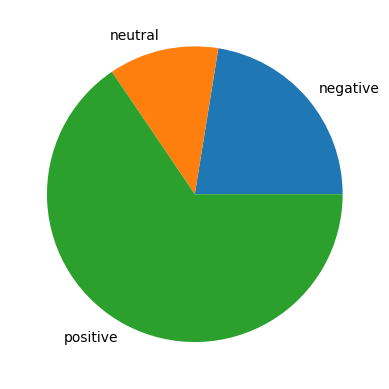

In [12]:
category.plot(kind='pie', y='score')

<Axes: xlabel='score'>

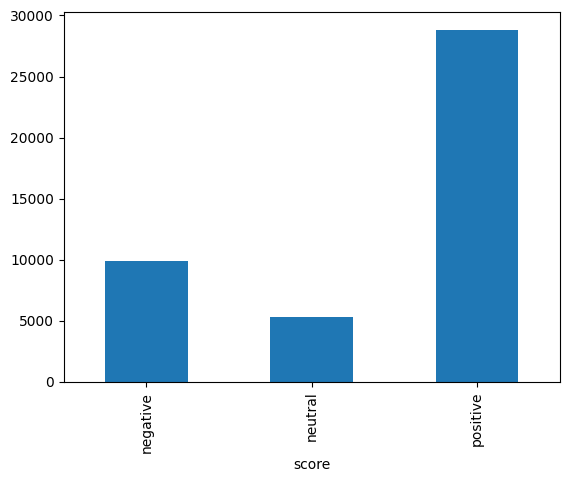

In [13]:
category.plot(kind='bar', y='score')

In [14]:
df = df[df['score'] != 'neutral']
df

,Text,Cleaned_Text,Lemmatized_Text,Tokenized_Text,Polarity,score
0,"Rasy to use really... But there never, ever sh...",use really But there never ever be any By fore...,use really But there never ever be any By fore...,"[use, really, But, there, never, ever, be, any...",0.100000,positive
1,I still do not understand why your restricting...,I still do not understand why restricting cert...,I still do not understand why restricting cert...,"[I, still, do, not, understand, why, restricti...",0.084345,positive
2,Keeps disappearing from home page. Very disapp...,Keeps disappearing home page Very disappointin...,Keeps disappearing home page Very disappointin...,"[Keeps, disappearing, home, page, Very, disapp...",-0.780000,negative
4,App is now working for me as expected. Google ...,is now working me as expected Google Pay smart...,is now working me a expected Google Pay smart ...,"[is, now, working, me, a, expected, Google, Pa...",0.160877,positive
5,Good,Good,Good,[Good],0.700000,positive
...,...,...,...,...,...,...
43980,I have been using app from past 6 months. I se...,I have been using past 6 months I see an issue...,I have been using past 6 month I see an issue ...,"[I, have, been, using, past, 6, month, I, see,...",-0.250000,negative
43981,App is good for paying Credit card bills. Rece...,is good paying Credit card bills Recently I ma...,is good paying Credit card bill Recently I mad...,"[is, good, paying, Credit, card, bill, Recentl...",0.075000,positive
43983,Scary - Uninstalled it after going through my ...,Scary it after going through research Happy ol...,Scary it after going through research Happy ol...,"[Scary, it, after, going, through, research, H...",0.038095,positive
43984,You want me rate your app here you go. You are...,want me rate here go are luring us raffles spi...,want me rate here go are luring u raffle spin ...,"[want, me, rate, here, go, are, luring, u, raf...",0.268885,positive


In [15]:
df['scoremap'] = df["score"].map( lambda score: 1 if score == "positive" else 0)
df

,Text,Cleaned_Text,Lemmatized_Text,Tokenized_Text,Polarity,score,scoremap
0,"Rasy to use really... But there never, ever sh...",use really But there never ever be any By fore...,use really But there never ever be any By fore...,"[use, really, But, there, never, ever, be, any...",0.100000,positive,1
1,I still do not understand why your restricting...,I still do not understand why restricting cert...,I still do not understand why restricting cert...,"[I, still, do, not, understand, why, restricti...",0.084345,positive,1
2,Keeps disappearing from home page. Very disapp...,Keeps disappearing home page Very disappointin...,Keeps disappearing home page Very disappointin...,"[Keeps, disappearing, home, page, Very, disapp...",-0.780000,negative,0
4,App is now working for me as expected. Google ...,is now working me as expected Google Pay smart...,is now working me a expected Google Pay smart ...,"[is, now, working, me, a, expected, Google, Pa...",0.160877,positive,1
5,Good,Good,Good,[Good],0.700000,positive,1
...,...,...,...,...,...,...,...
43980,I have been using app from past 6 months. I se...,I have been using past 6 months I see an issue...,I have been using past 6 month I see an issue ...,"[I, have, been, using, past, 6, month, I, see,...",-0.250000,negative,0
43981,App is good for paying Credit card bills. Rece...,is good paying Credit card bills Recently I ma...,is good paying Credit card bill Recently I mad...,"[is, good, paying, Credit, card, bill, Recentl...",0.075000,positive,1
43983,Scary - Uninstalled it after going through my ...,Scary it after going through research Happy ol...,Scary it after going through research Happy ol...,"[Scary, it, after, going, through, research, H...",0.038095,positive,1
43984,You want me rate your app here you go. You are...,want me rate here go are luring us raffles spi...,want me rate here go are luring u raffle spin ...,"[want, me, rate, here, go, are, luring, u, raf...",0.268885,positive,1


Test Accuracy: 0.9609819121447029
Confusion Matrix:
[[1799  157]
 [ 145 5639]]
Test Score: 0.9609819121447029


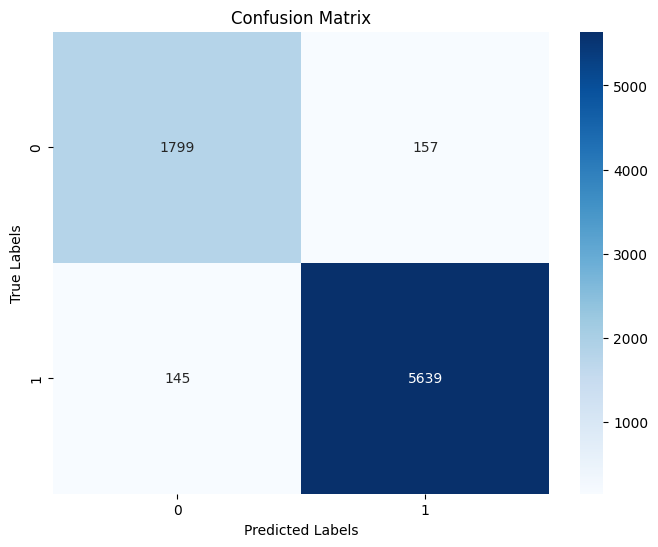

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import uniform

# Load the dataset and split into features (X) and target labels (y)
X = df['Text']
y = df['scoremap']

# Perform text vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression model
logreg = LogisticRegression()

# Create RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and train the model
best_params = random_search.best_params_
logreg.set_params(**best_params)
logreg.fit(X_train, y_train)

# Predict the labels for training and test sets
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


print(f'Test Accuracy: {test_accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:')
print(cm)

test_score = logreg.score(X_test, y_test)
print(f"Test Score: {test_score}")

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Test Accuracy: 0.9583979328165375
Confusion Matrix:
[[1776  180]
 [ 142 5642]]
Test Score: 0.9583979328165375


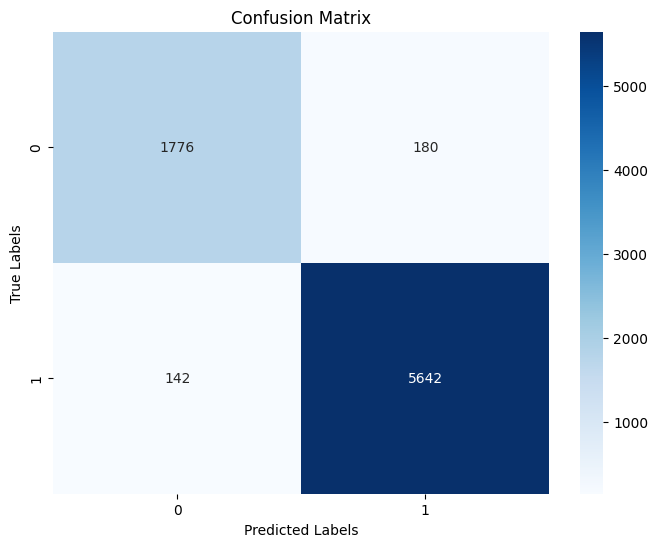

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and split into features (X) and target labels (y)
X = df['Text']
y = df['scoremap']

# Perform text vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': uniform(loc=0, scale=4),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
svm = SVC()

# Create RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and train the model
best_params = random_search.best_params_
svm.set_params(**best_params)
svm.fit(X_train, y_train)

# Predict the labels for training and test sets
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


print(f'Test Accuracy: {test_accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:')
print(cm)

test_score = svm.score(X_test, y_test)
print(f"Test Score: {test_score}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Test Accuracy: 0.9391472868217055
Confusion Matrix:
[[1713  243]
 [ 228 5556]]
Test Score: 0.9391472868217055


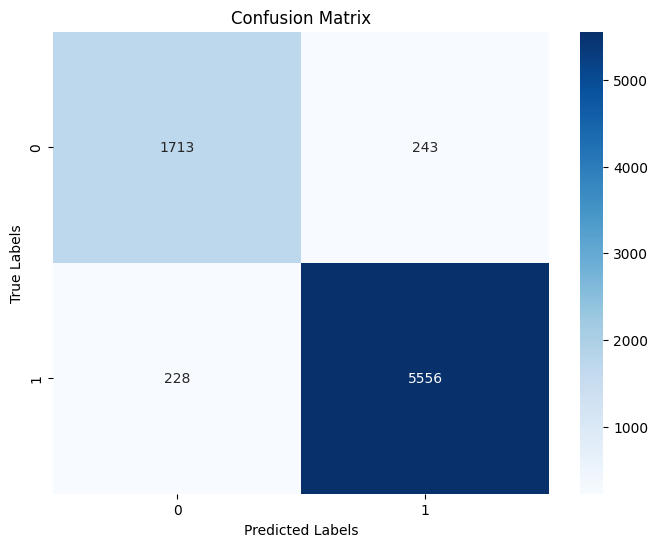

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import uniform

# Load the dataset and split into features (X) and target labels (y)
X = df['Text']
y = df['scoremap']

# Perform text vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()

# Create RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and train the model
best_params = random_search.best_params_
dtc.set_params(**best_params)
dtc.fit(X_train, y_train)

# Predict the labels for training and test sets
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


print(f'Test Accuracy: {test_accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:')
print(cm)

test_score = dtc.score(X_test, y_test)
print(f"Test Score: {test_score}")

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Test Accuracy: 0.9347545219638242
Confusion Matrix:
[[1594  362]
 [ 143 5641]]
Test Score: 0.9347545219638242


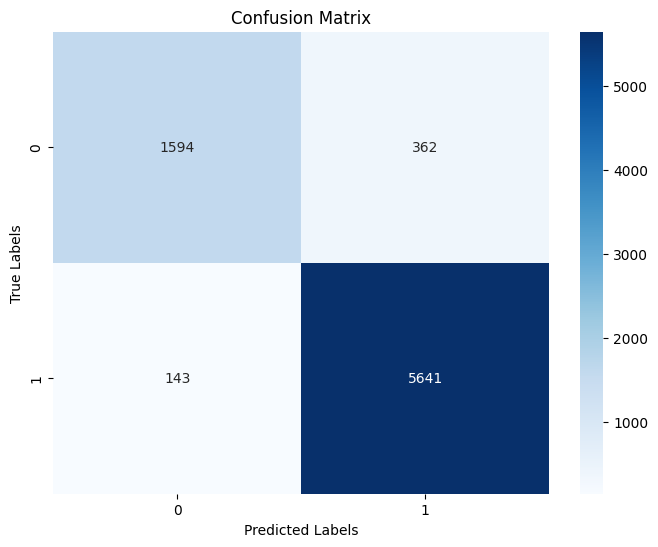

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import uniform

# Load the dataset and split into features (X) and target labels (y)
X = df['Text']
y = df['scoremap']

# Perform text vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a Random Forest classifier
rfc = RandomForestClassifier()

# Create RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and train the model
best_params = random_search.best_params_
rfc.set_params(**best_params)
rfc.fit(X_train, y_train)

# Predict the labels for training and test sets
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


print(f'Test Accuracy: {test_accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:')
print(cm)

test_score = rfc.score(X_test, y_test)
print(f"Test Score: {test_score}")

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [20]:
import re
stra=[]
searchlist=['easy','love','good','useful']
cleandata=df['Text'].tolist()
for s in searchlist:
    for i in cleandata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            stra.append(i)

In [21]:
(pd.Series(stra))

0        Love this app easy to 7se and helps keep every...
1             Very helpful and easy to understand and use.
2        there is nothing simple and easy about it Goog...
3        Works as intended, and easy to setup. Just mak...
4        I have a problem with this app but you wont!!!...
                               ...                        
10796    The app was good and useful until suddenly my ...
10797    A very much important and useful app that care...
10798    very useful app for those people using more th...
10799    App works fine, But, I used sbi debit card for...
10800    The app experience is smooth but to be honest ...
Length: 10801, dtype: object

In [22]:
import re
stra=[]
searchlist=['useless','worst','bad','issue','poor']
cleandata=df['Text'].tolist()
for s in searchlist:
    for i in cleandata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            stra.append(i)

In [23]:
(pd.Series(stra))

0       Some places only accept Apple Pay or no mobile...
1       Apparently this app isn't working at all in ot...
2                                 It's absolutely useless
3       DO NOT BE DECEIVED I went over to the payment ...
4       Doesn't work on my Samsung S9 5G. The customer...
                              ...                        
6069    Worst app. Dont pay bill or other payment. Ver...
6070    New update too slow, and interface too poor. N...
6071    Worst app for Payments. It has only animations...
6072    The credit card payments are fine works great....
6073    Very bad experience. I had done a payment to m...
Length: 6074, dtype: object

In [24]:
import re
stra=[]
newdata=[]

cleandata=df['Text'].tolist()
mainsearch=['app']
for s in mainsearch:
    for i in cleandata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            newdata.append(i)

searchlist=['easy','love','good','useful']
for s in searchlist:
    for i in newdata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            stra.append(i)

In [25]:
(pd.Series(stra))

0       Love this app easy to 7se and helps keep every...
1       there is nothing simple and easy about it Goog...
2       I have a problem with this app but you wont!!!...
3       3 star because when I use my card on google pa...
4       This app is called google pay app is very legi...
                              ...                        
5700    The app was good and useful until suddenly my ...
5701    A very much important and useful app that care...
5702    very useful app for those people using more th...
5703    App works fine, But, I used sbi debit card for...
5704    The app experience is smooth but to be honest ...
Length: 5705, dtype: object

In [26]:
import re
stra=[]
newdata=[]

cleandata=df['Text'].tolist()
mainsearch=['app']
for s in mainsearch:
    for i in cleandata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            newdata.append(i)

searchlist=['useless','worst','bad','issue','poor']
for s in searchlist:
    for i in newdata:
        searchdata=re.compile(s)
        if searchdata.search(i):
            stra.append(i)

In [27]:
(pd.Series(stra))

0       Apparently this app isn't working at all in ot...
1       DO NOT BE DECEIVED I went over to the payment ...
2       I absolutely don't understand why would I need...
3       You broke an app that worked and made this thi...
4       Worst app ever absolutely useless I miss apple...
                              ...                        
3668    Very poor customer care services. There is no ...
3669    Worst app. Dont pay bill or other payment. Ver...
3670    Worst app for Payments. It has only animations...
3671    The credit card payments are fine works great....
3672    Very bad experience. I had done a payment to m...
Length: 3673, dtype: object

In [41]:
df['Text'] = df['Text'].astype(str)
df['Text'] = df['Text'].apply( lambda x: x.lower())
positive_tweets = df[df['score'] == 'positive']

In [42]:
custom_stopwords = ['t', 'rt', 'ti', 'vk', 'to', 'co',
                    'dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd']
STOP_WORDS = STOPWORDS.union(custom_stopwords)

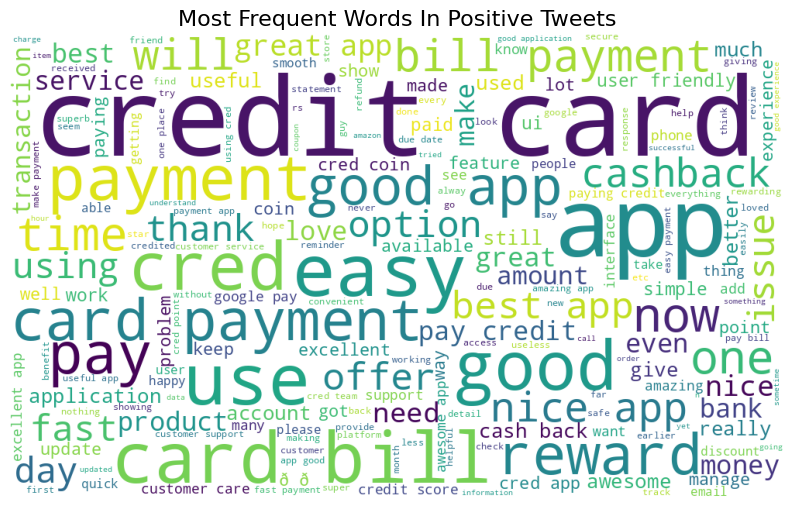

In [43]:
plt.figure(figsize=(10, 12))

plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(positive_tweets.Text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Positive Tweets', fontsize=16)
plt.show()

In [44]:
negative_tweets = df[df['score'] == 'negative']

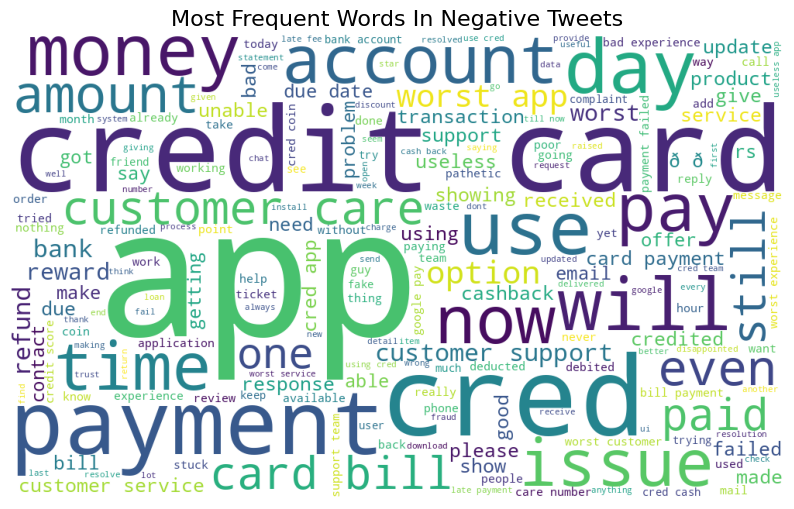

In [45]:
plt.figure(figsize=(10, 12))
plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(negative_tweets.Text.values)))
plt.axis('off')
plt.title('Most Frequent Words In Negative Tweets', fontsize=16)
plt.show()

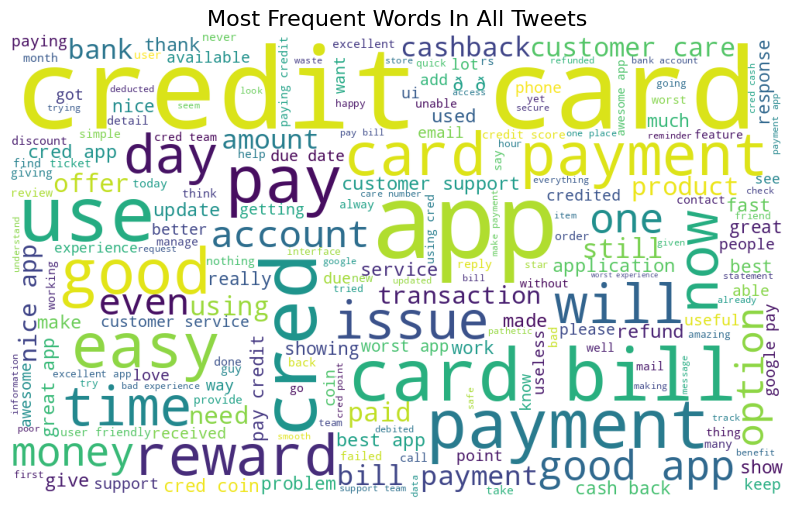

In [46]:
plt.figure(figsize=(10, 12))
plt.imshow(WordCloud(width=1000, height=600, background_color='white', stopwords=STOP_WORDS).generate(
    ' '.join(df.Text .values)))
plt.axis('off')
plt.title('Most Frequent Words In All Tweets', fontsize=16)
plt.show()